In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [2]:

print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# summary of the dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Handling missing values
# For 'Age', Filling missing values with the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [6]:

# For 'Embarked',  filling missing values with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [7]:
# For 'Cabin', creating a new feature 'HasCabin' which indicates if a passenger had a cabin
titanic['HasCabin'] = titanic['Cabin'].notnull().astype(int)
titanic.drop('Cabin', axis=1, inplace=True)



In [8]:
# Converting categorical variables into numerical ones
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
# Droping unnecessary columns
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)



In [10]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,True,False,True
1,1,1,38.0,1,0,71.2833,1,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,1,False,False,True
4,0,3,35.0,0,0,8.0500,0,True,False,True


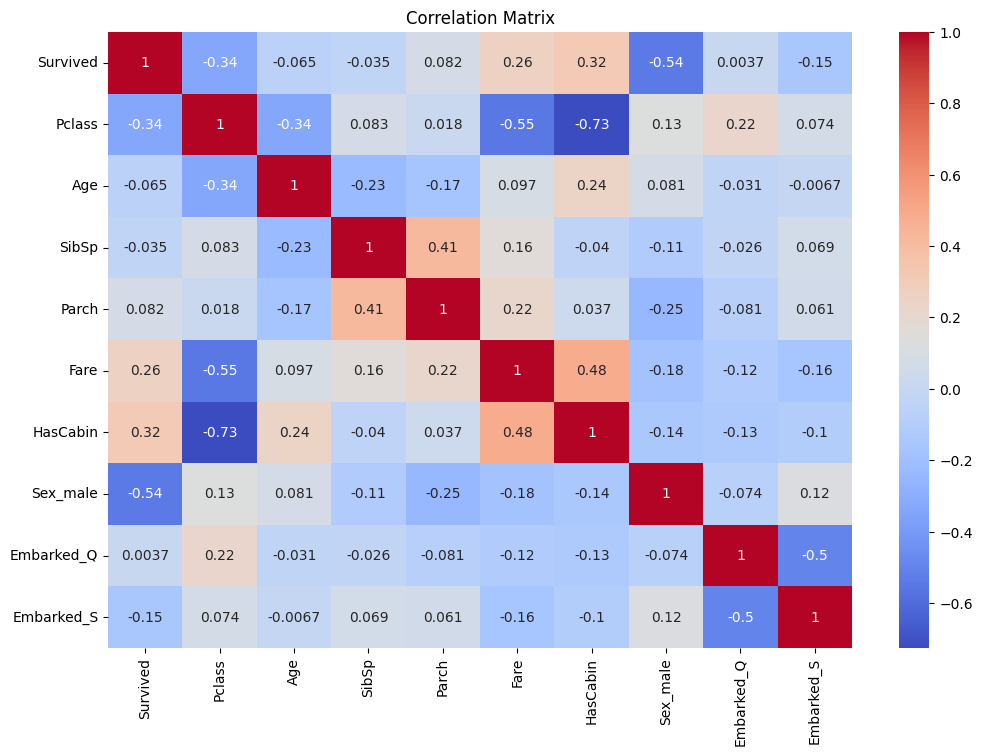

In [11]:
# Performing EDA
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



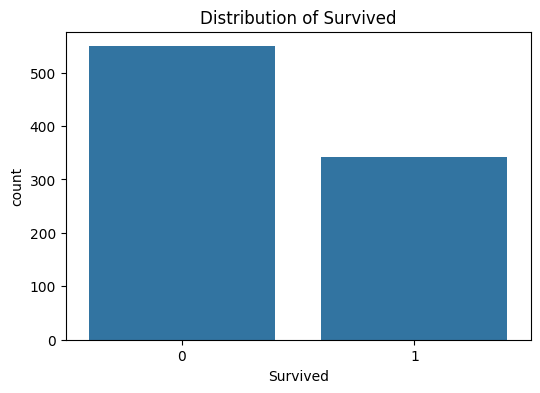

In [12]:
# Distribution of 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survived')
plt.show()



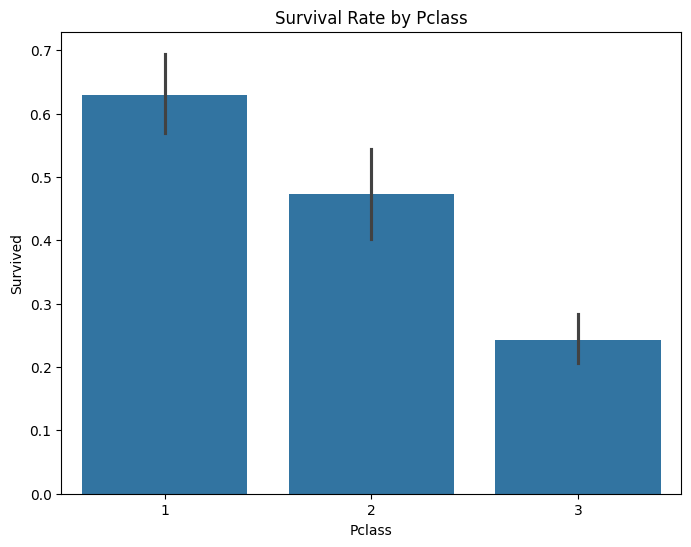

In [13]:
# Survival rate by 'Pclass'
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Pclass')
plt.show()



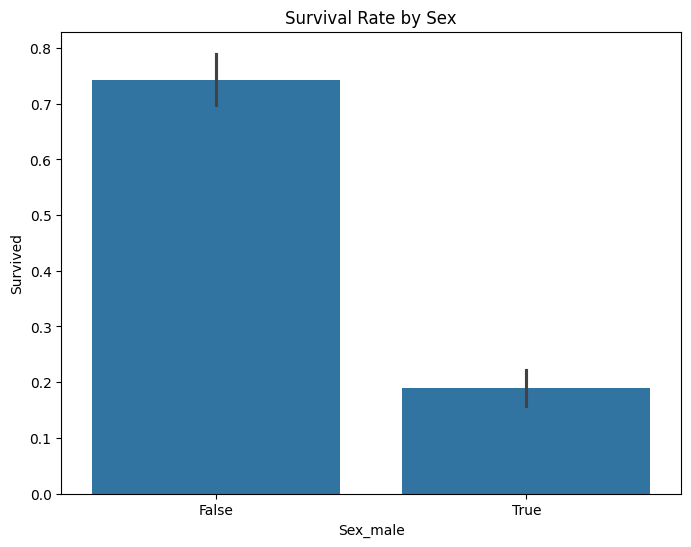

In [16]:
# Survival rate by 'Sex'
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex_male', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()


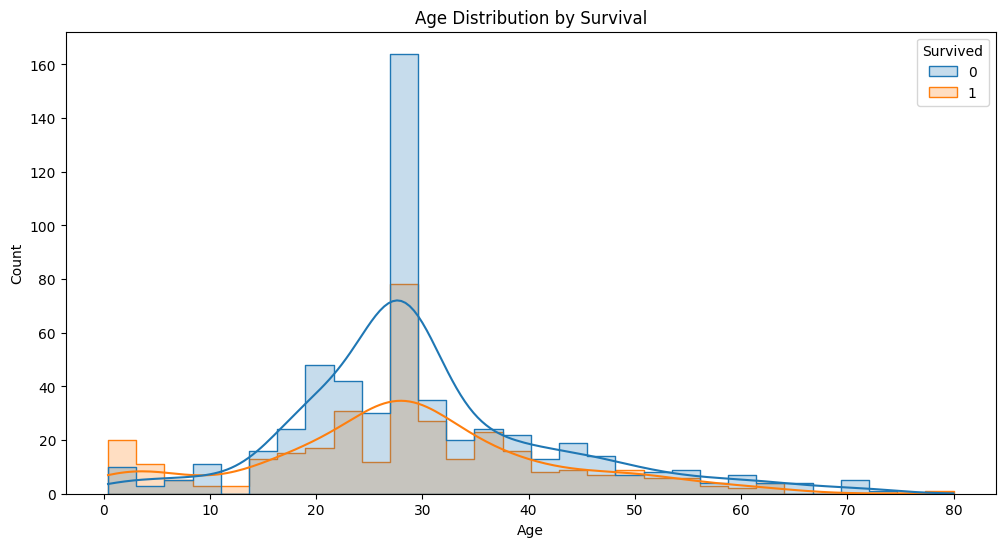

In [17]:
# Age distribution by survival
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.show()



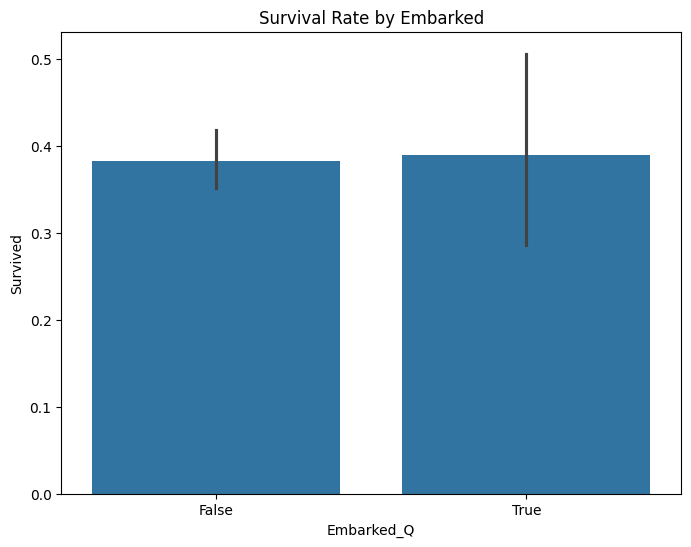

In [18]:
# Survival rate by 'Embarked'
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked_Q', y='Survived', data=titanic)
plt.title('Survival Rate by Embarked')
plt.show()



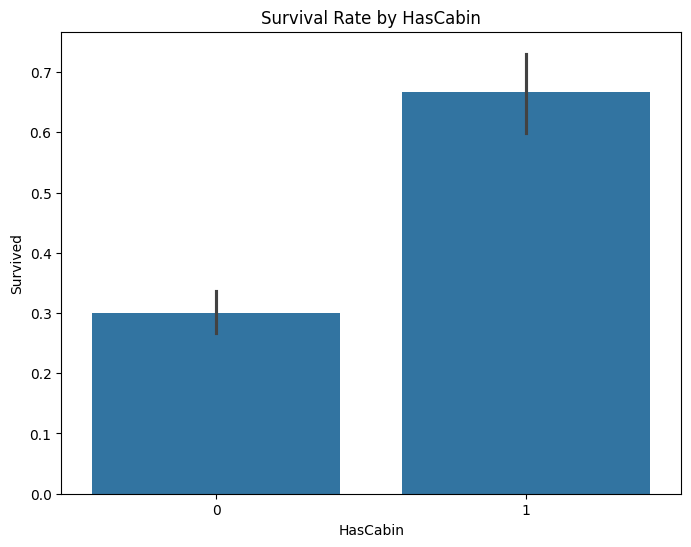

In [19]:
# Survival rate by 'HasCabin'
plt.figure(figsize=(8, 6))
sns.barplot(x='HasCabin', y='Survived', data=titanic)
plt.title('Survival Rate by HasCabin')
plt.show()